In [1]:
# import library

import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA, KernelPCA

import gensim
import umap
from gensim.models import word2vec

In [2]:
# load dataset

data = pd.read_csv('../dataset/data_preprocessing.csv', index_col = 0)

In [3]:
data.head(15)

,Ayah,Text,Char_Length,Casefolding,Tokenizing
Surah,,,,,
1,1,Dengan menyebut nama Allah Yang Maha Pemurah l...,65,dengan menyebut nama allah yang maha pemurah l...,"['dengan', 'menyebut', 'nama', 'allah', 'yang'..."
1,2,"Segala puji bagi Allah, Tuhan semesta alam.",43,segala puji bagi allah tuhan semesta alam,"['segala', 'puji', 'bagi', 'allah', 'tuhan', '..."
1,3,Maha Pemurah lagi Maha Penyayang.,33,maha pemurah lagi maha penyayang,"['maha', 'pemurah', 'lagi', 'maha', 'penyayang']"
1,4,Yang menguasai di Hari Pembalasan.,34,yang menguasai di hari pembalasan,"['yang', 'menguasai', 'di', 'hari', 'pembalasan']"
1,5,"Hanya Engkaulah yang kami sembah, dan hanya ke...",86,hanya engkaulah yang kami sembah dan hanya kep...,"['hanya', 'engkaulah', 'yang', 'kami', 'sembah..."
1,6,Tunjukilah kami jalan yang lurus,32,tunjukilah kami jalan yang lurus,"['tunjukilah', 'kami', 'jalan', 'yang', 'lurus']"
1,7,(yaitu) Jalan orang-orang yang telah Engkau be...,147,yaitu jalan orang orang yang telah engkau ber...,"['yaitu', 'jalan', 'orang', 'orang', 'yang', '..."
2,1,Alif laam miim.,15,alif laam miim,"['alif', 'laam', 'miim']"
2,2,Kitab (Al Quran) ini tidak ada keraguan padany...,83,kitab al quran ini tidak ada keraguan padanya ...,"['kitab', 'al', 'quran', 'ini', 'tidak', 'ada'..."


In [4]:
# tokenizing

word_tokens = [word_tokenize(Text.lower()) for Text in data.Casefolding]
word_tokens

[['dengan',
  'menyebut',
  'nama',
  'allah',
  'yang',
  'maha',
  'pemurah',
  'lagi',
  'maha',
  'penyayang'],
 ['segala', 'puji', 'bagi', 'allah', 'tuhan', 'semesta', 'alam'],
 ['maha', 'pemurah', 'lagi', 'maha', 'penyayang'],
 ['yang', 'menguasai', 'di', 'hari', 'pembalasan'],
 ['hanya',
  'engkaulah',
  'yang',
  'kami',
  'sembah',
  'dan',
  'hanya',
  'kepada',
  'engkaulah',
  'kami',
  'meminta',
  'pe',
  'olongan'],
 ['tunjukilah', 'kami', 'jalan', 'yang', 'lurus'],
 ['yaitu',
  'jalan',
  'orang',
  'orang',
  'yang',
  'telah',
  'engkau',
  'beri',
  'nikmat',
  'kepada',
  'mereka',
  'bukan',
  'jalan',
  'mereka',
  'yang',
  'dimurkai',
  'dan',
  'bukan',
  'pula',
  'jalan',
  'mereka',
  'yang',
  'sesat'],
 ['alif', 'laam', 'miim'],
 ['kitab',
  'al',
  'quran',
  'ini',
  'tidak',
  'ada',
  'keraguan',
  'padanya',
  'petunjuk',
  'bagi',
  'mereka',
  'yang',
  'be',
  'akwa'],
 ['yaitu',
  'mereka',
  'yang',
  'beriman',
  'kepada',
  'yang',
  'ghaib',
 

In [5]:
# build model sendiri

model = gensim.models.Word2Vec(word_tokens, vector_size=264, window=4, min_count=3, workers=2)

In [6]:
model.save('vector.w2v')

In [7]:
model.build_vocab(word_tokens, progress_per=1000)

In [8]:
# training ulang model

model.train(word_tokens,
            total_examples=model.corpus_count,
            epochs=100,
            report_delay=100)

(10702559, 16214700)

In [9]:
print(model)

Word2Vec(vocab=3144, vector_size=264, alpha=0.025)


In [10]:
print(model.wv['allah'])

[-1.80161521e-01  6.23860419e-01  3.98939729e-01  3.18664938e-01
 -1.13140357e+00 -4.32024337e-02  1.00741637e+00 -9.78906988e-04
 -5.75978041e-01  6.29900157e-01 -8.43858421e-01  4.13396239e-01
 -1.33237910e+00 -6.79183185e-01  1.13168979e+00  9.62583423e-01
  1.32604852e-01 -1.89012393e-01 -6.58478677e-01 -1.59836531e-01
  4.55990881e-02  2.87756115e-01  3.74001078e-02  1.61736000e+00
 -8.57324898e-01 -7.78741539e-01 -7.54772604e-01 -1.39742389e-01
 -9.78226662e-01  5.96593738e-01 -2.53893822e-01  4.22999173e-01
  1.80070892e-01  2.20582461e+00  2.71843672e-01  1.00465786e+00
  1.07083631e+00 -5.04557550e-01  8.95119131e-01 -8.65975767e-02
  6.97866231e-02  1.06528230e-01 -3.43663603e-01 -7.14120626e-01
  8.18155944e-01  3.00277650e-01  9.74804536e-03 -5.24569154e-01
 -1.08139217e-01 -5.12312055e-01 -7.21974134e-01  2.00310540e+00
  9.46210474e-02 -3.34086031e-01  8.73924315e-01 -4.63078976e-01
  1.23762536e+00  7.71041662e-02  5.92828393e-01 -1.06221187e+00
 -6.81571901e-01  5.10818

In [12]:
print(model.wv.similarity('surga', 'neraka'))

0.48941907


In [13]:
print(model.wv.similar_by_word('neraka', topn=10, restrict_vocab=None))

[('jahannam', 0.518552303314209), ('surga', 0.4894191026687622), ('menyala', 0.4329182207584381), ('jannah', 0.4207819402217865), ('nyala', 0.4185572564601898), ('kubur', 0.38873374462127686), ('api', 0.3769015371799469), ('kebinasaan', 0.36686715483665466), ('perutnya', 0.3566315472126007), ('hadapannya', 0.35292908549308777)]


In [14]:
word_list = ['allah', 'takwa', 'surga', 'kami', 'muhammad', 'kitab', 'syaitan', 'dengki', 'jin', 'manusia']

In [15]:
# daftar vektor dari kata-kata tersebut

word_vectors = np.array([model.wv[w] for w in word_list])

In [16]:
# reduksi dimensi vektor ke 2D agar bisa di-plot pada bidang 2D

dimred = PCA(n_components=2, copy=False, whiten=True)
red_word_vectors = dimred.fit_transform(word_vectors)

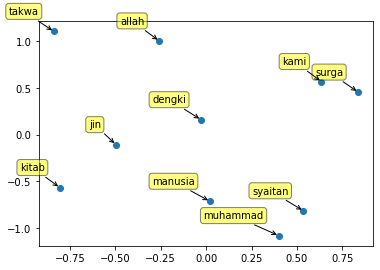

In [17]:
def plot(datas, labels, fc='yellow'):
    
    # plot the dots
    plt.subplots_adjust(bottom = 0.1)
    plt.scatter(datas[:, 0], datas[:, 1], marker='o')

    # annotate labels
    for label, x, y in zip(labels, datas[:, 0], datas[:, 1]):
        plt.annotate( \
            label, \
            xy=(x, y), xytext=(-15, 15), \
            textcoords='offset points', ha='right', va='bottom', \
            bbox=dict(boxstyle='round,pad=0.3', fc=fc, alpha=0.5), \
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

    plt.show()

# kita plot !
plot(word_vectors, word_list)

In [ ]:
# Visualization higher order

import umap.umap_ as umap

X = umap.UMAP().fit_transform(model.wv.vectors)
df = pd.DataFrame(X, columns=['umap1', 'umap2'])
df['Tweet'] = model.wv.index_to_key
df

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [ ]:
fig = px.scatter(df,
                 x='umap1',
                 y='umap2',
                 text='Tweet')
fig.update_traces(textposition='top center')
fig.update_layout(height=800,
                 title_text='Reduced FastText Visualization')

fig.show()